In [1]:
# import tensorflow as tf
# from tensorflow.keras import backend as K
# from tensorflow.keras.losses import mean_squared_error

# def approx_loss(y_pred, params):
#     y_lower = tf.constant(params['y_l'], shape=(len(y_pred), 1))
#     y_upper = tf.constant(params['y_u'], shape=(len(y_pred), 1))
    
#     return K.sum(K.relu(y_lower - y_pred) + K.relu(y_pred - y_upper))

                 
# def combined_loss(params):
#     # wrapper function needed for the custom loss function to be accepted from keras
#     def loss(y_true, y_pred):
#         data_based_loss = mean_squared_error(y_true, y_pred)
#         approximation_loss = approx_loss(y_pred, params)
#         lambda_A = params['lambda_A']

#         return data_based_loss + lambda_A * approximation_loss
#     return fun

# HYPER_PARAMS = {'y_l':3,
#                 'y_u':4,
#                 'lambda_A': 0.5,
#                 }

# approx_loss([0, 1, 2, 3], HYPER_PARAMS)

In [2]:
import numpy as np
import tensorflow as tf

import data_preprocessing as util
import lstm_model as lstm

tf.compat.v1.set_random_seed(1)

### Set Hyperparameters

In [3]:
HYPER_PARAMS = {'n_epochs': 10,
                'd_sample': 1,
                'gauss_sigma': 10 , 
                'n_steps': 50,
                'n_features':2,
                'n_lstm_units_1': 50,
                'alpha_1': 0.1,
                'n_lstm_units_2': 20,
                'alpha_2': 0.1,
                'n_dense_units': 10,
                'activation': 'tanh',
                'dropout': 0.2,
                'learning_rate': 0.001,
                'early_stopping': 20,
                'optimizer': 'Adam',
                'loss': 'mse',
                'metric': 'mae',
                'y_l':3,
                'y_u':4,
                'lambda_A': 0.5,
                }

### Prepare Training Data

In [4]:
X_train, y_train, scalers_train = util.prepare_data(HYPER_PARAMS, ['Profile 10A'], 0, 4)

Input: (3000, 50, 2) 
Output/Label: (3000, 1)


### Initialize and Train Model

In [5]:
lstm = lstm.Model()
lstm.initialize(HYPER_PARAMS)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 50)            10600     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 50, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 20)                5680      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 20)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 16,301
Trainable params: 16,301
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
94/94 [==============================] - 2s 20ms/step - loss: 36.7592 - mse: 0.8370 - mae: 0.7754
Epoch 2/10
94/94 [==============================] - 2s 20ms/step - loss: 33.2058 - mse: 1.1305 - mae: 0.9311
Epoch 3/10
94/94 [==============================] - 2s 20ms/step - loss: 33.1519 - mse: 1.1386 - mae: 0.9349
Epoch 4/10
94/94 [==============================] - 2s 20ms/step - loss: 33.1294 - mse: 1.1419 - mae: 0.9365
Epoch 5/10
94/94 [==============================] - 2s 20ms/step - loss: 33.1170 - mse: 1.1436 - mae: 0.9373
Epoch 6/10
94/94 [==============================] - 2s 19ms/step - loss: 33.1092 - mse: 1.1448 - mae: 0.9379
Epoch 7/10
94/94 [==============================] - 2s 20ms/step - loss: 33.1039 - mse: 1.1455 - mae: 0.9383
Epoch 8/10
94/94 [==============================] - 2s 20ms/step - loss: 33.1001 - mse: 1.1461 - mae: 0.9385
Epoch 9/10
94/94 [==============================] - 2s 19ms/step - loss: 33.0975 - mse: 1.1465 - mae: 0.9387
Epoch 10/10
94/94 [

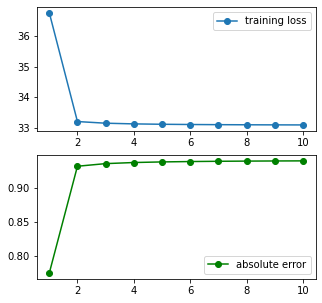

INFO:tensorflow:Assets written to: trained_models/5939\assets


In [6]:
lstm.train(X_train, y_train, scalers_train)

# save model and hyperparameters
MODEL_ID = str(np.random.randint(10000))
lstm.model.save('trained_models/' + str(MODEL_ID))
np.save('trained_models/' + str(MODEL_ID) + '/hyperparameters', HYPER_PARAMS)

### Prepare Validation & Test Data

In [7]:
X_validation, y_validation, scalers_validation = util.prepare_data(HYPER_PARAMS, ['Profile 10A'], 0, 4)
X_test, y_test, scalers_test = util.prepare_data(HYPER_PARAMS, ['Profile 10A'], 0, 4)

scalers = scalers_train, scalers_validation, scalers_test 
# scalers shape: ((train_cur, train_volt), (val_cur, val_volt), (test_cur, test_volt))

Input: (3000, 50, 2) 
Output/Label: (3000, 1)
Input: (3000, 50, 2) 
Output/Label: (3000, 1)


### Test Model

94/94 [==============================] - 0s 4ms/step
###########################################################
        Training    Validation      Test
----  ----------  ------------  --------
MSE     0.000596      0.000596  0.000596
MAE     0.0214        0.0214    0.0214
MaxE    0.0456        0.0456    0.0456
###########################################################


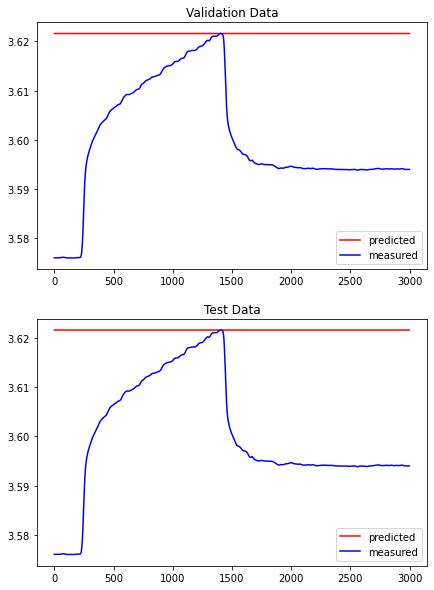

(0.0005958744544280047, 0.0005958744544280047, 0.0005958744544280047)

In [8]:
lstm.test(X_train, y_train, X_validation, y_validation, X_test, y_test, scalers)